1.First of all we will do the analysis of the data and try to find more about it.

2.Model training - create model(s) to learn to predict a target variable based on other variables.

3.Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.

4.Model comparison - comparing several different models to find the best one.

5.Hyperparameter tuning - finding better values for hyperparameters that can improve performance.

6.save the model and go for the result of prediction

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
flight_df=pd.read_excel("Datasets/Data_Train.xlsx")
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [57]:
flight_df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

here we can see the number of non-stop flights,1stop flights,2 stops flights,3 stops flights,4-stops flights

In [58]:
no_of_airlines = pd.DataFrame(flight_df["Airline"].value_counts().reset_index())
no_of_airlines = no_of_airlines.rename(columns={"index": "Airline", "Airline": "Count"})
no_of_airlines


,Airline,Count
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1752
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


There are the total number of flights of respective company unit that provides their services to the Airports

<Axes: xlabel='Airline'>

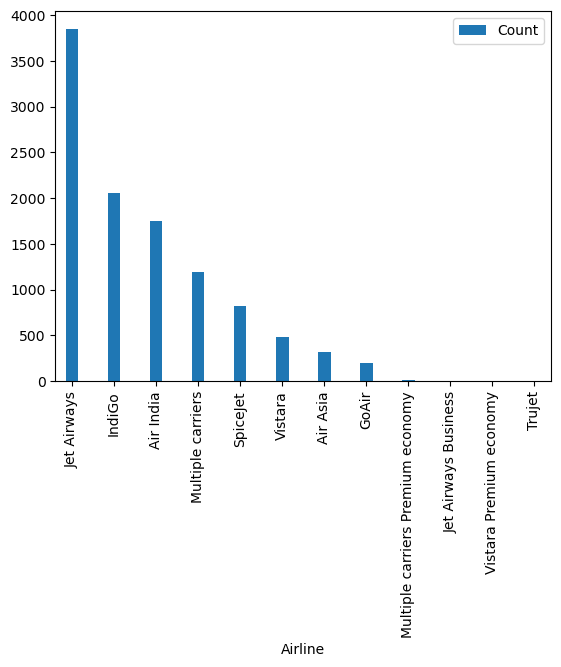

In [59]:
no_of_airlines.plot(kind="bar",x="Airline",y="Count",width=0.3)

In [60]:
air_source_df=flight_df.groupby(["Airline","Source"])[["Airline"]].count().rename(columns={'Airline':"flights_count"})
air_source_df.reset_index(inplace=True)
air_source_df

,Airline,Source,flights_count
0,Air Asia,Banglore,89
1,Air Asia,Delhi,80
2,Air Asia,Kolkata,150
3,Air India,Banglore,332
4,Air India,Chennai,25
5,Air India,Delhi,747
6,Air India,Kolkata,512
7,Air India,Mumbai,136
8,GoAir,Banglore,93
9,GoAir,Delhi,76


These are the respective flights of their company with their source of departure , we can easily found the place where is maximum number of flights available

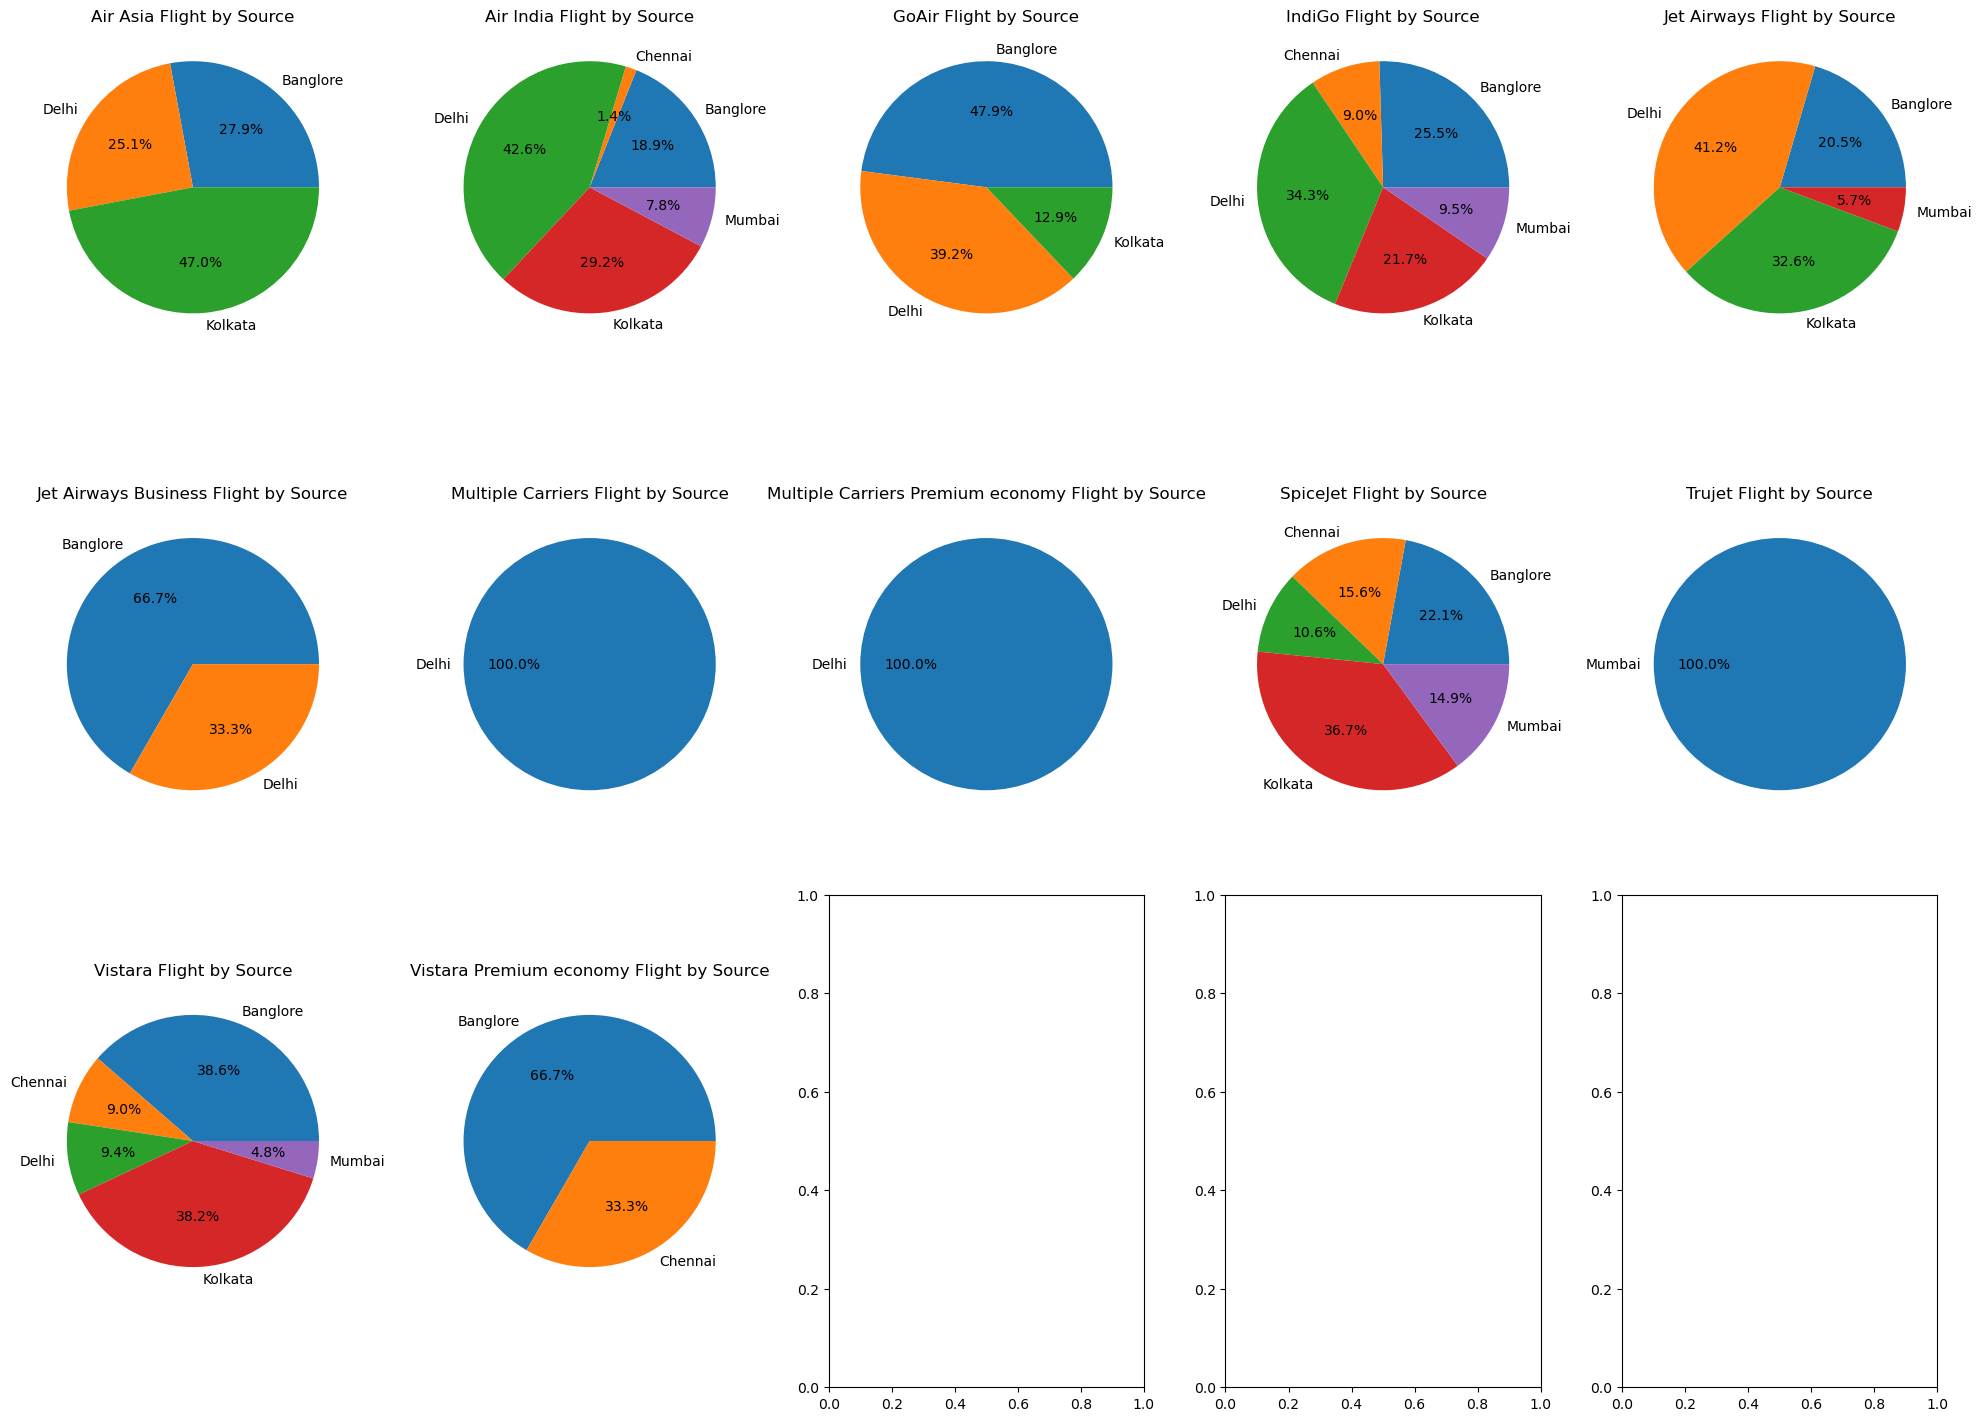

In [61]:

Air_asia_df = air_source_df[air_source_df["Airline"] == "Air Asia"]
Air_India_df = air_source_df[air_source_df["Airline"] == "Air India"]
GoAir_df=air_source_df[air_source_df["Airline"]=="GoAir"]
IndiGo_df = air_source_df[air_source_df["Airline"] == "IndiGo"]
Jet_Airways_df = air_source_df[air_source_df["Airline"] == "Jet Airways"]
Jet_Airways_Business_df = air_source_df[air_source_df["Airline"] == "Jet Airways Business"]
Multiple_Carriers_df = air_source_df[air_source_df["Airline"] == "Multiple carriers"]
Multiple_Carriers_Premium_economy_df = air_source_df[air_source_df["Airline"] == "Multiple carriers Premium economy"]
SpiceJet_df = air_source_df[air_source_df["Airline"] == "SpiceJet"]
Trujet_df = air_source_df[air_source_df["Airline"] == "Trujet"]
Vistara_df = air_source_df[air_source_df["Airline"] == "Vistara"]
Vistara_Premium_economy_df = air_source_df[air_source_df["Airline"] == "Vistara Premium economy"]


fig, ax = plt.subplots(3, 5, figsize=(20, 15))

# Loop through each airline or flight category and create pie charts
airlines = [
    (Air_asia_df, "Air Asia Flight by Source"),
    (Air_India_df, "Air India Flight by Source"),
    (GoAir_df, "GoAir Flight by Source"),
    (IndiGo_df, "IndiGo Flight by Source"),
    (Jet_Airways_df, "Jet Airways Flight by Source"),
    (Jet_Airways_Business_df, "Jet Airways Business Flight by Source"),
    (Multiple_Carriers_df, "Multiple Carriers Flight by Source"),
    (Multiple_Carriers_Premium_economy_df, "Multiple Carriers Premium economy Flight by Source"),
    (SpiceJet_df, "SpiceJet Flight by Source"),
    (Trujet_df, "Trujet Flight by Source"),
    (Vistara_df, "Vistara Flight by Source"),
    (Vistara_Premium_economy_df, "Vistara Premium economy Flight by Source")
]

for i, (data, title) in enumerate(airlines):
    row = i // 5
    col = i % 5
    
    ax[row][col].set_title(title)
    ax[row][col].pie(data["flights_count"], labels=data["Source"], autopct="%1.1f%%")

plt.tight_layout()
plt.show()




This is the complate visualization of the flights with their source

In [62]:
selected_airlines = ['Air Asia','Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'Vistara', 'SpiceJet', 'Trujet', 'Vistara Premium economy']

# Filter the DataFrame for selected airlines
filtered_df = air_source_df[air_source_df["Airline"].isin(selected_airlines)]

# Find the maximum number of flights for each airline
max_flights_per_airline = filtered_df.groupby("Airline")["flights_count"].max()

# Find the source(s) with the maximum number of flights for each airline
result = filtered_df.merge(max_flights_per_airline, on=["Airline", "flights_count"], suffixes=('', '_max'))
pd.DataFrame(result)
# Display the result
# print(pd.DataFrame(result))

,Airline,Source,flights_count
0,Air Asia,Kolkata,150
1,Air India,Delhi,747
2,GoAir,Banglore,93
3,IndiGo,Delhi,705
4,Jet Airways,Delhi,1586
5,Jet Airways Business,Banglore,4
6,Multiple carriers,Delhi,1196
7,Multiple carriers Premium economy,Delhi,13
8,SpiceJet,Kolkata,300
9,Trujet,Mumbai,1


This is the maximum number of flights of their airline agencies with their source

In [63]:
  
air_source_df2=flight_df.groupby(["Airline","Source","Destination"])[["Airline"]].count().rename(columns={'Airline':"flights_count"})
air_source_df2.reset_index(inplace=True)
air_source_df2

,Airline,Source,Destination,flights_count
0,Air Asia,Banglore,Delhi,71
1,Air Asia,Banglore,New Delhi,18
2,Air Asia,Delhi,Cochin,80
3,Air Asia,Kolkata,Banglore,150
4,Air India,Banglore,Delhi,120
5,Air India,Banglore,New Delhi,212
6,Air India,Chennai,Kolkata,25
7,Air India,Delhi,Cochin,747
8,Air India,Kolkata,Banglore,512
9,Air India,Mumbai,Hyderabad,136


the source and destination of flights with flights of airline agencies so that passenger can choose any of the airline service from the place where it is going to be departure

But what about the time of departure and time of arrival, the duration that flight takes?

In [64]:
flight_route_df=flight_df[(flight_df["Airline"]=="Air Asia")&(flight_df["Source"]=="Banglore")&(flight_df["Destination"]=="Delhi")]
flight_route_df[["Source","Destination","Dep_Time","Arrival_Time","Duration"]].head(20)

,Source,Destination,Dep_Time,Arrival_Time,Duration
43,Banglore,Delhi,11:10,13:55,2h 45m
54,Banglore,Delhi,23:55,02:45 04 Apr,2h 50m
189,Banglore,Delhi,11:10,13:55,2h 45m
618,Banglore,Delhi,04:55,07:45,2h 50m
664,Banglore,Delhi,11:10,13:55,2h 45m
747,Banglore,Delhi,11:10,13:55,2h 45m
1264,Banglore,Delhi,23:55,02:45 07 May,2h 50m
1405,Banglore,Delhi,11:10,13:55,2h 45m
1499,Banglore,Delhi,23:55,02:45 19 Jun,2h 50m
1636,Banglore,Delhi,23:55,02:45 25 May,2h 50m


This dataframe cleares your that doubt also, passenger can feel happy by knowing the details of their flights in such a manner

In [65]:
flight_route_df2=flight_df[(flight_df["Total_Stops"]!="non-stop")]
flight_route_df2[["Airline","Source","Destination","Route","Total_Stops"]].head(10)

,Airline,Source,Destination,Route,Total_Stops
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop
10,Air India,Delhi,Cochin,DEL → BLR → COK,1 stop
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1 stop


this the route of the flights which are not non-stop

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original data
encoded_rent = flight_df.copy()

columns_to_encode = ["Airline", "Source", "Route", "Total_Stops", "Destination", "Duration", "Dep_Time", "Date_of_Journey","Arrival_Time","Additional_Info"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for column in columns_to_encode:
    encoded_rent[column] = label_encoder.fit_transform(encoded_rent[column])

# Save the encoded DataFrame to a CSV file
encoded_rent.to_csv('Datasets/Flights_ticket_Prediction_converted.csv', index=False)

Here we modiefied our dataset by converting all non-numerical data into numerical dataset

In [67]:
flight_dataset=pd.read_csv("Datasets/Flights_ticket_Prediction_converted.csv")
flight_dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8,4107
10679,1,29,3,0,64,193,1305,237,4,8,4145
10680,4,29,0,2,18,58,824,280,4,8,7229
10681,10,0,0,5,18,92,938,238,4,8,12648


In [68]:
flight_dataset.isna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


Checking whether there is any type of not a numerical data available

<Axes: >

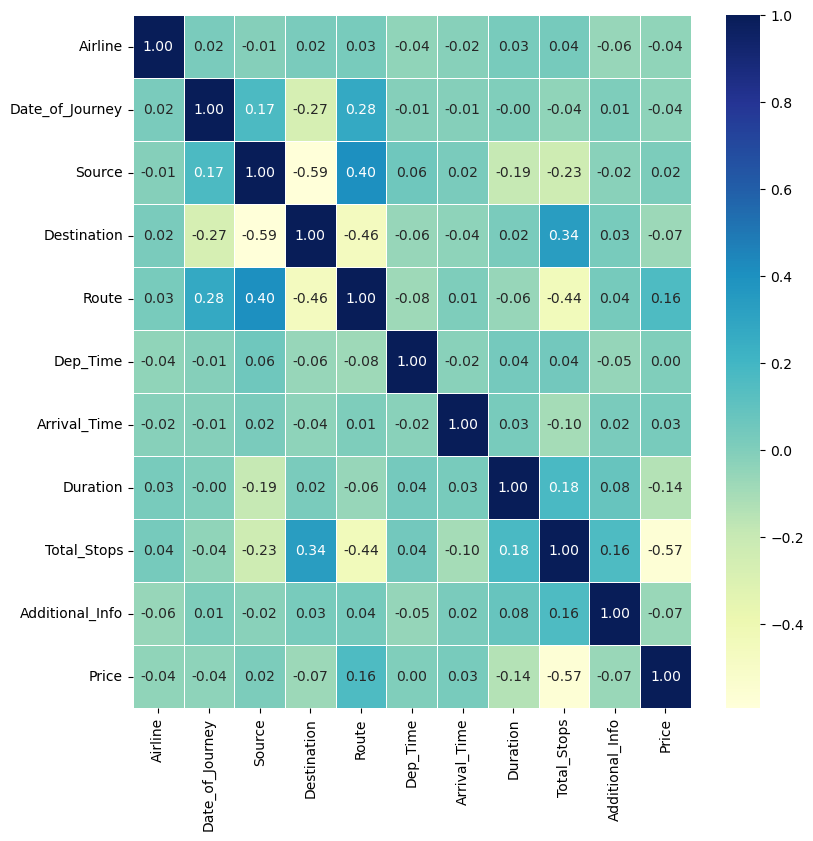

In [79]:

corr_matrix=flight_dataset.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap='YlGnBu')

This is the correlation matrix of our dataset that shows relation of perticular column with other columns

In [77]:
X=flight_dataset.drop("Price",axis=1)
print(len(X))
X.head(10)

10683


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,233,240,4,8
1,1,6,3,0,84,31,906,336,1,8
2,4,43,2,1,118,70,413,106,1,8
3,3,10,3,0,91,164,1324,311,0,8
4,3,0,0,5,29,149,1237,303,0,8
5,8,27,3,0,64,66,830,235,4,8
6,4,8,0,5,5,172,742,65,0,5
7,4,0,0,5,5,55,463,145,0,8
8,4,8,0,5,5,65,742,185,0,5
9,6,30,2,1,104,91,1124,341,0,8


In [78]:
y=flight_dataset["Price"]
y.head(10)

0     3897
1     7662
2    13882
3     6218
4    13302
5     3873
6    11087
7    22270
8    11087
9     8625
Name: Price, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,#independent variables
                                               y,#dependent variable
                                               test_size=0.2  ) #percentage 
#a thumb ru;e is to use 80% of your data to train and other 20% of your data to test

In [82]:
X_train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
8990,4,8,4,3,58,39,1009,11,1,8
3684,4,42,2,1,104,92,888,191,0,5
1034,8,25,2,1,121,138,1243,323,0,8
3909,6,20,2,1,104,105,294,32,0,8
3088,1,27,2,1,110,154,1143,192,1,8
5426,8,41,3,0,64,153,1153,236,4,8
906,10,33,0,2,18,74,877,240,4,8
7171,3,15,3,0,64,210,181,237,4,8
6535,3,43,4,3,48,38,562,121,4,8
3677,8,4,3,0,64,154,1155,236,4,8


In [84]:
y_train.head()

8990    23528
3684    12373
1034     5583
3909     7695
3088    11972
Name: Price, dtype: int64

In [85]:
X_test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
6076,4,18,3,0,66,30,1044,29,0,5
3544,2,35,2,1,104,83,1152,356,0,8
7313,4,6,3,0,66,119,1158,315,0,8
5032,3,26,1,4,127,127,1015,234,4,8
2483,4,22,2,1,104,215,423,313,0,5
9894,6,38,2,1,104,51,1093,17,0,8
346,4,30,2,1,104,77,1093,356,0,8
6366,4,13,0,2,18,182,1279,280,4,8
8270,8,23,1,4,127,160,1172,234,4,8
3393,4,22,2,1,104,55,1093,12,0,8


In [87]:
y_test.head(),len(y_test)

(6076    10844
 3544     4959
 7313    14781
 5032     3858
 2483    12898
 Name: Price, dtype: int64,
 2137)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


models={"Random Forest":RandomForestRegressor(),
        "Lasso Regression":LinearRegression(),
        "Gradient Boosting":GradientBoostingRegressor(),
        }

#create a function to fit the model:- 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    #make list to keep the models at a place 
    model_scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores 

{'Random Forest': 0.8858606519657815,
 'Lasso Regression': 0.3520583571536712,
 'Gradient Boosting': 0.8189950981756939}

Great we got a nice score our Random Forest model is 88.58% accurate

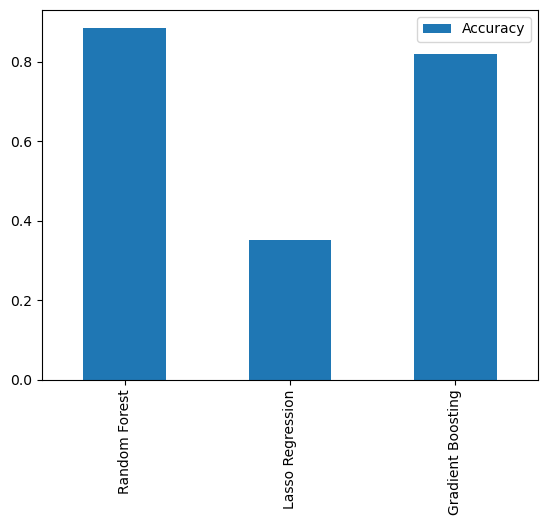

In [89]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

In [90]:
# randomized search CV

n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=5)]  # Narrowed range
max_features = ['sqrt']  # Stick with 'sqrt' for diversity
max_depth = [int(x) for x in np.linspace(7, 30, num=3)]  # Reduced range
min_samples_split = [2, 5, 10]  # Smaller values for finer control
min_samples_leaf = [1, 2, 4]  # Smaller values for finer control

In [91]:
# create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = models["Random Forest"], param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter=5)

rf_random.fit(X_train,y_train)


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [7, 18, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_squared_error')

In [94]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [95]:
prediction = rf_random.predict(X_test) 

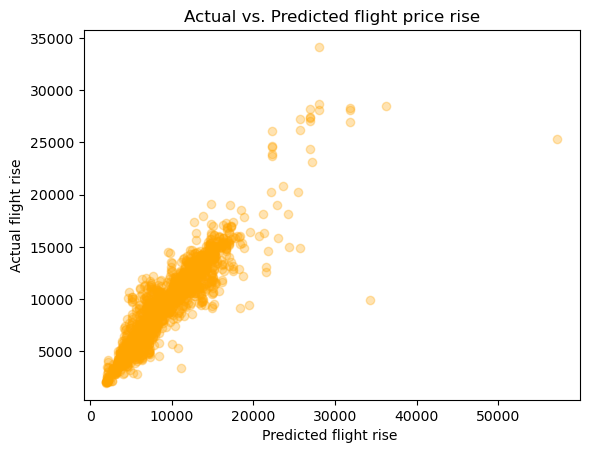

In [96]:
plt.scatter(y_test,prediction,alpha =0.3,color="Orange")
plt.title('Actual vs. Predicted flight price rise')
plt.xlabel('Predicted flight rise ')
plt.ylabel('Actual flight rise');

In [97]:
print("MAE:" , mean_absolute_error(y_test,prediction))
print("MSE:" , mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prediction)))

MAE: 1000.4742236413585
MSE: 3030049.129806349
RMSE: 1740.7036306638615


In [98]:
test_df = pd.DataFrame({
    "Predicted flight price" : models["Random Forest"].predict(X_test),
    "Actual flight price" : y_test,
}).reset_index(drop = True)
test_df

,Predicted flight price,Actual flight price
0,10822.920000,10844
1,6867.180000,4959
2,14638.780000,14781
3,3669.080000,3858
4,12384.720000,12898
...,...,...
2132,12376.266833,7408
2133,5442.280000,4622
2134,6645.570000,7452
2135,4796.600000,4823


In [99]:
#Saving the model
import pickle as pkl
file = open("flight_ticket_Prediction.pkl", 'wb')
pkl.dump(models["Random Forest"], file)

In [100]:
#Open  the model:- -
model = open('flight_ticket_Prediction.pkl','rb')
flight_ticket_Prediction = pkl.load(model)

In [101]:
print(f'R2 score {r2_score(y_test,flight_ticket_Prediction.predict(X_test))}')
print("MAE:" , mean_absolute_error(y_test,flight_ticket_Prediction.predict(X_test)))
print("MSE:" , mean_squared_error(y_test,flight_ticket_Prediction.predict(X_test)))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,flight_ticket_Prediction.predict(X_test)))) 

R2 score 0.8858606519657815
MAE: 786.2844852578529
MSE: 2415641.287413655
RMSE: 1554.2333439395948


# so our flight ticket prediction model predicts the flight ticket price to be :- ₹786.28